# Q1

define delta_t

In [20]:
import numpy as np
import matplotlib.pyplot as plt

k_b = 1.380 * 10**(- 23)  # J/K, Boltzmann Constant
T = 300  # K , Temperature 
eta = 10**(- 3)  # Ns/m²,  viscosity
R = 10**(- 6)   # m  , radius of particle 
k_x = 10**(- 6)  # N/m, stiﬀness
k_y = 9 * 10**(- 6)  # N/m. stiﬀness

gamma = 6 * np.pi * eta * R
tau_rap_x = gamma / k_x
tau_rap_y = gamma / k_y

print("x diﬀerent stiﬀnesses ", tau_rap_x)
print("y diﬀerent stiﬀnesses ", tau_rap_y)

dt_x = 0.05 * tau_rap_x
dt_y = 0.05 * tau_rap_y
dt = np.minimum(dt_x, dt_y)
print(f"timestep = {dt}" )

x diﬀerent stiﬀnesses  0.01884955592153876
y diﬀerent stiﬀnesses  0.0020943951023931952
timestep = 0.00010471975511965977


# P1
Plot the trajectory of the disk in the Cartesian plane.

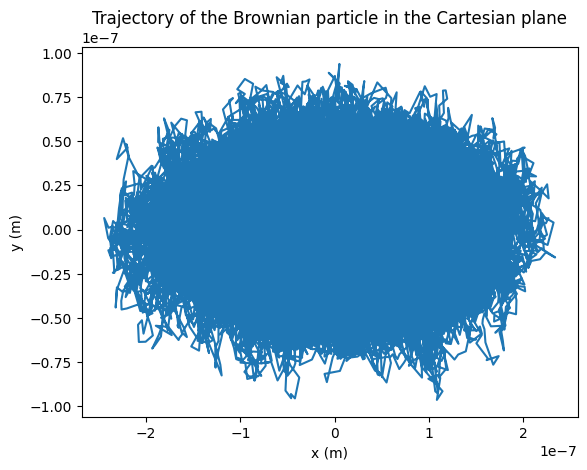

In [21]:

x = 0
y = 0

x_trajectory = [x]
y_trajectory = [y]

t_total = 30
num_steps = int(t_total / dt)

for _ in range(num_steps):
   
    w_x = np.random.normal(0, 1)
    w_y = np.random.normal(0, 1)

    
    x = x - (k_x / gamma) * x * dt + np.sqrt(2 * (k_b * T / gamma) * dt) * w_x
    y = y - (k_y / gamma) * y * dt + np.sqrt(2 * (k_b * T / gamma) * dt) * w_y

    x_trajectory.append(x)
    y_trajectory.append(y)

plt.plot(x_trajectory, y_trajectory)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajectory of the Brownian particle in the Cartesian plane')
plt.savefig('P1_trajactory.png')
plt.show()



## P2 

Plot the probability distribution of the positions in xand in y (two separate histograms: one for xand one
for y). Compare each case with the expected Boltzmann distribution

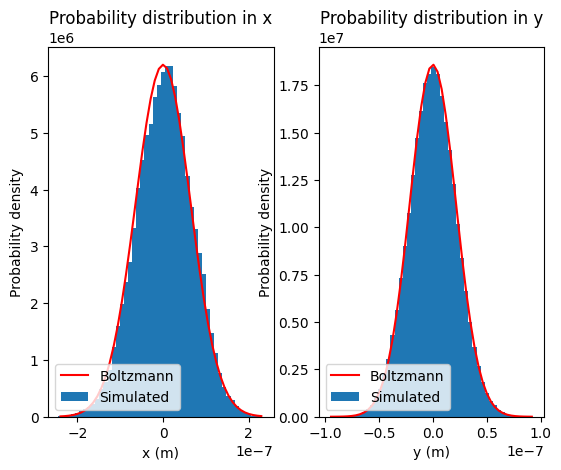

In [25]:

# _hist : representing the probability density [use: density=True] of the particle's x or y - positions within bins. 
# _bin_edges: defining the boundaries of bins for calculating the x - position probability distribution.

x_hist, x_bin_edges = np.histogram(x_trajectory, bins=50, density=True)
y_hist, y_bin_edges = np.histogram(y_trajectory, bins=50, density=True)

# Boltamann distibution - x axis
x_positions = (x_bin_edges[1:] + x_bin_edges[:-1]) / 2
U_x = 0.5 * k_x * x_positions ** 2
boltzmann_x = np.exp(-U_x / (k_b * T))
boltzmann_x /= np.sum(boltzmann_x) * (x_bin_edges[1] - x_bin_edges[0])

# Boltamann distibution - y axis
y_positions = (y_bin_edges[1:] + y_bin_edges[:-1]) / 2
U_y = 0.5 * k_y * y_positions ** 2
boltzmann_y = np.exp(-U_y / (k_b * T))
boltzmann_y /= np.sum(boltzmann_y) * (y_bin_edges[1] - y_bin_edges[0])

# Plot x 
plt.subplot(1, 2, 1)
plt.bar(x_positions, x_hist, width=(x_bin_edges[1] - x_bin_edges[0]), label='Simulated')
plt.plot(x_positions, boltzmann_x, 'r', label='Boltzmann')
plt.xlabel('x (m)')
plt.ylabel('Probability density')
plt.title('Probability distribution in x')
plt.legend(loc='lower left')

# Plot y
plt.subplot(1, 2, 2)
plt.bar(y_positions, y_hist, width=(y_bin_edges[1] - y_bin_edges[0]), label='Simulated')
plt.plot(y_positions, boltzmann_y, 'r', label='Boltzmann')
plt.xlabel('y (m)')
plt.ylabel('Probability density')
plt.title('Probability distribution in y')
plt.legend(loc='lower left')

plt.savefig('P2_Probability_distribution.png')
plt.show()
plt.pause(1)
plt.close()

In [14]:
import numpy as np
sigma_x_squared = np.var(x_trajectory)
sigma_y_squared = np.var(y_trajectory)

print(f'sigma_x_squared = {sigma_x_squared}, sigma_y_squared = {sigma_y_squared}')

if sigma_x_squared > sigma_y_squared:
    print("x variance is larger ")
elif sigma_y_squared > sigma_x_squared:
    print("y variance is larger")
else:
    print(" x and y variance is equal")

sigma_x_squared_theoretical = (k_b * T) / k_x
sigma_y_squared_theoretical = (k_b * T) / k_y

print(f'theorical variance in a harmonic trap, sigma_x_squared = {sigma_x_squared_theoretical}, sigma_y_squared =  {sigma_y_squared_theoretical}' )

sigma_x_squared = 4.196631458265196e-15, sigma_y_squared = 4.607489519704521e-16
x variance is larger 
theorical variance in a harmonic trap, sigma_x_squared = 4.1399999999999994e-15, sigma_y_squared =  4.599999999999999e-16


## P3 Calculate and plot the position autocorrelation function 



Nx=286479,Ny = 286479
n = 0
n = 5000
n = 10000
n = 15000
n = 20000
n = 25000
n = 30000
n = 35000
n = 40000
n = 45000
n = 50000
n = 55000
n = 60000
n = 65000
n = 70000
n = 75000
n = 80000
n = 85000
n = 90000
n = 95000
n = 100000
n = 105000
n = 110000
n = 115000
n = 120000
n = 125000
n = 130000
n = 135000
n = 140000


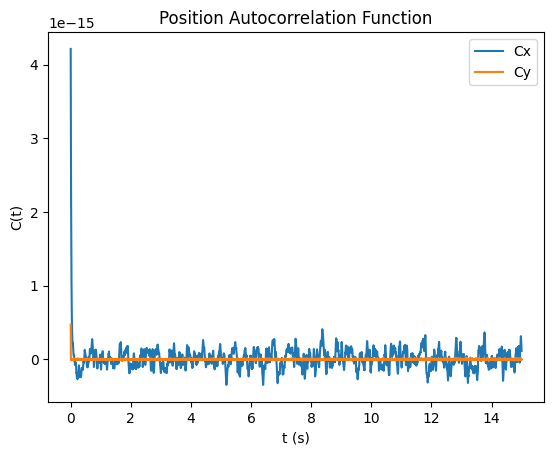

In [23]:


def calculate_Cx(x_trajectory, n):
    x = np.array(x_trajectory)
    N = len(x)
    result = np.sum(x[n:N] * x[0:(N - n)])
    return (1 / (N - n)) * result


def calculate_Cy(y_trajectory, n):
    y = np.array(y_trajectory)
    N = len(y)
    result = np.sum(y[n:N] * y[0:(N - n)])
    return (1 / (N - n)) * result


Nx = len(x_trajectory)
Ny = len(y_trajectory)

print(f'Nx={Nx},Ny = {Ny}')
n_values = range(0, Nx // 2)

Cx_values = []
Cy_values = []

for n in n_values:
   
    Cx_value = calculate_Cx(x_trajectory, n)
    Cx_values.append(Cx_value)

    
    Cy_value = calculate_Cy(y_trajectory, n)
    Cy_values.append(Cy_value)
    #DEBUG
    if n % 5000 == 0:
        print(f'n = {n}')


plt.plot([n * dt for n in n_values], Cx_values, label='Cx')
plt.plot([n * dt for n in n_values], Cy_values, label='Cy')
plt.xlabel('t (s)')
plt.ylabel('C(t)')
plt.title('Position Autocorrelation Function')
plt.savefig('P3_position_autocorrelation_function .png')
plt.legend()
plt.show()

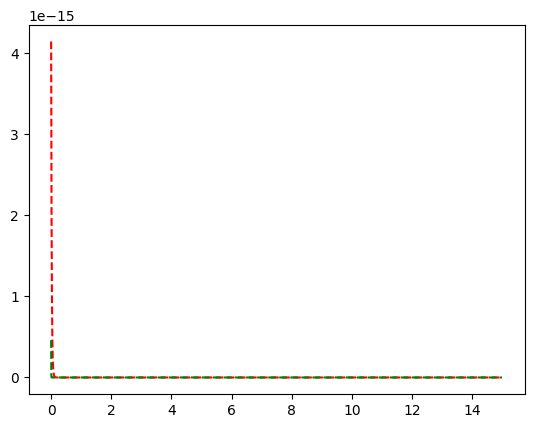

In [24]:
def theoretical_Cx(t, k_b, T, k_x, gamma):
    return (k_b * T) / k_x * np.exp(-k_x * t / gamma)

def theoretical_Cy(t, k_b, T, k_y, gamma):
    return (k_b * T) / k_y * np.exp(-k_y * t / gamma)

t_values = [n * dt for n in n_values]
plt.plot(t_values, [theoretical_Cx(t, k_b, T, k_x, gamma) for t in t_values], 'r--', label='Theoretical Cx')
plt.plot(t_values, [theoretical_Cy(t, k_b, T, k_y, gamma) for t in t_values], 'g--', label='Theoretical Cy')
plt.savefig('P4_Theoretical_position_autocorrelation_function .png')